In [1]:
# !pip update yfinance
# !pip install yfinance --upgrade --no-cache-dir
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import pandas_datareader.data as web
import yfinance as yf

In [2]:
# cryptocurrencies = ['MATIC-USD','SOL-USD', 'ETH-USD']
# Equity: MSCI All-Country World Index, MXWD
# Bloomberg Barclays US Government Inflation-Linked 7 to 10 Years, BCIT5T
'''
Dependent Variable (y)= MATIC-USD
Independent Variables (Xi)= see below

Asset - Proxy Ticker
Equity: iShares MSCI ACWI ETF, ACWI
Bonds: Bloomberg Barclays Global Aggregate Bond, LEGATRUU
Bonds Alternative: Templeton Global Bond Fund (TPINX)
Commodities: S&P GSCI Total Return, ^SPGSCITR
Commodities(Alternative):DBC
Market Volatility: VIX
Rates: Bloomberg Barclays Global Government 7 to 10 Years Hedged to USD, LGY7TRUH
Credit:. Fidelity Global Credit Fund (FGBFX)
Emg Mkts:
- EM Equity: MSCI Emerging Markets Net Return Index, MSCI
- EM Credit: Bloomberg Barclays Emerging Markets USD Aggregate , EMUSTRUU
- EM Currency: MSCI Emerging Markets Currency Index, MXEF0CX0
USD Inflation:iShares Intnl Inflation-Linked Bond (ITIP) 

'''
securities = ['MATIC-USD','BTC-USD','ETH-USD','ACWI',  '^LEGATRUU', '^SPGSCITR', '^VIX', '^LGY7TRUH',
              'MSCI', 'EMUSTRUU', 'MXEF0CX0', 'BFIXA','DBC', 'CL=F', 'GC=F','FGBFX','TPINX']
all_data = yf.download(securities, period = "36mo",ignore_tz = True)

all_data

[*********************100%***********************]  17 of 17 completed

5 Failed downloads:
- ^LGY7TRUH: No data found, symbol may be delisted
- BFIXA: No data found, symbol may be delisted
- MXEF0CX0: No data found, symbol may be delisted
- EMUSTRUU: No data found, symbol may be delisted
- ^LEGATRUU: No data found, symbol may be delisted


Adj Close                                                     \
                 ACWI BFIXA       BTC-USD       CL=F        DBC EMUSTRUU   
Date                                                                       
2020-03-15        NaN   NaN   5392.314941        NaN        NaN      NaN   
2020-03-16  54.033813   NaN   5014.479980  28.700001  11.311702      NaN   
2020-03-17  57.408550   NaN   5225.629395  26.950001  11.132781      NaN   
2020-03-18  53.957760   NaN   5238.438477  20.370001  10.765002      NaN   
2020-03-19  54.299992   NaN   6191.192871  25.219999  10.993622      NaN   
...               ...   ...           ...        ...        ...      ...   
2023-03-11        NaN   NaN  20632.410156        NaN        NaN      NaN   
2023-03-12        NaN   NaN  22163.949219        NaN        NaN      NaN   
2023-03-13        NaN   NaN  24197.533203  74.800003  23.520000      NaN   
2023-03-14  87.330002   NaN  24746.074219  71.330002  23.219999      NaN   
2023-03-15  86.120003   NaN  24530.031250  68.230003  22.680000      NaN   

                                                          ... Volume  \
                ETH-USD     FGBFX         GC=F MATIC-USD  ...  FGBFX   
Date                                                      ...          
2020-03-15   125.214302       NaN          NaN  0.009926  ...    NaN   
2020-03-16   110.605873  8.359847  1485.900024  0.008096  ...    0.0   
2020-03-17   113.942749  8.121244  1524.900024  0.009089  ...    0.0   
2020-03-18   114.842270  7.856134  1477.300049  0.008864  ...    0.0   
2020-03-19   136.593857  7.758927  1478.599976  0.011258  ...    0.0   
...                 ...       ...          ...       ...  ...    ...   
2023-03-11  1482.616699       NaN          NaN  1.064282  ...    NaN   
2023-03-12  1590.292969       NaN          NaN  1.156988  ...    NaN   
2023-03-13  1680.308960       NaN  1911.699951  1.193400  ...    NaN   
2023-03-14  1703.507080  7.540000  1906.199951  1.200760  ...    0.0   
2023-03-15  1659.462036       NaN  1923.300049  1.126403  ...    NaN   

                                                                               \
                GC=F  MATIC-USD       MSCI MXEF0CX0 TPINX ^LEGATRUU ^LGY7TRUH   
Date                                                                            
2020-03-15       NaN   21441211        NaN      NaN   NaN       NaN       NaN   
2020-03-16     193.0   25883801  1661700.0      NaN   0.0       NaN       NaN   
2020-03-17     122.0   23719851  1291000.0      NaN   0.0       NaN       NaN   
2020-03-18     333.0   21128020  1384800.0      NaN   0.0       NaN       NaN   
2020-03-19     262.0   35490951  1195800.0      NaN   0.0       NaN       NaN   
...              ...        ...        ...      ...   ...       ...       ...   
2023-03-11       NaN  714358473        NaN      NaN   NaN       NaN       NaN   
2023-03-12       NaN  705749746        NaN      NaN   NaN       NaN       NaN   
2023-03-13     503.0  947657046        NaN      NaN   NaN       NaN       NaN   
2023-03-14     503.0  993352077   639000.0      NaN   0.0       NaN       NaN   
2023-03-15  376775.0  795268992   494826.0      NaN   NaN       NaN       NaN   

                           
           ^SPGSCITR ^VIX  
Date                       
2020-03-15       NaN  NaN  
2020-03-16       NaN  0.0  
2020-03-17       NaN  0.0  
2020-03-18       NaN  0.0  
2020-03-19       NaN  0.0  
...              ...  ...  
2023-03-11       NaN  NaN  
2023-03-12       NaN  NaN  
2023-03-13       NaN  NaN  
2023-03-14       NaN  0.0  
2023-03-15       0.0  0.0  

[1096 rows x 102 columns]

In [3]:
reg_df=all_data['Adj Close'].pct_change()

reg_df

,ACWI,BFIXA,BTC-USD,CL=F,DBC,EMUSTRUU,ETH-USD,FGBFX,GC=F,MATIC-USD,MSCI,MXEF0CX0,TPINX,^LEGATRUU,^LGY7TRUH,^SPGSCITR,^VIX
Date,,,,,,,,,,,,,,,,,
2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-16,NaN,NaN,-0.070069,NaN,NaN,NaN,-0.116667,NaN,NaN,-0.184364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-17,0.062456,NaN,0.042108,-0.060976,-0.015817,NaN,0.030169,-0.028542,0.026247,0.122653,0.045455,NaN,-0.005808,NaN,NaN,NaN,-0.081993
2020-03-18,-0.060109,NaN,0.002451,-0.244156,-0.033036,NaN,0.007894,-0.032644,-0.031215,-0.024755,-0.127911,NaN,-0.004868,NaN,NaN,NaN,0.007114
2020-03-19,0.006343,NaN,0.181878,0.238095,0.021237,NaN,0.189404,-0.012373,0.000880,0.270081,0.056532,NaN,-0.007828,NaN,NaN,NaN,-0.058208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11,0.000000,NaN,0.022052,0.000000,0.000000,NaN,0.037406,0.000000,0.000000,0.005079,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
2023-03-12,0.000000,NaN,0.074230,0.000000,0.000000,NaN,0.072626,0.000000,0.000000,0.087107,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
2023-03-13,0.000000,NaN,0.091752,-0.024517,-0.006337,NaN,0.056603,0.000000,0.026692,0.031471,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000


In [4]:
# reg_df=reg_df.dropna(inplace=True)
cols = reg_df.columns.tolist()
sorted_cols = ['MATIC-USD','BTC-USD','ETH-USD','ACWI', 'MSCI', '^VIX','DBC', 'CL=F', 'GC=F','FGBFX','TPINX']

# sorted_cols_trunc = sorted_cols[:52]
sorted_cols_trunc = sorted_cols[:-1]

df = reg_df[sorted_cols]
df

,MATIC-USD,BTC-USD,ETH-USD,ACWI,MSCI,^VIX,DBC,CL=F,GC=F,FGBFX,TPINX
Date,,,,,,,,,,,
2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-16,-0.184364,-0.070069,-0.116667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-17,0.122653,0.042108,0.030169,0.062456,0.045455,-0.081993,-0.015817,-0.060976,0.026247,-0.028542,-0.005808
2020-03-18,-0.024755,0.002451,0.007894,-0.060109,-0.127911,0.007114,-0.033036,-0.244156,-0.031215,-0.032644,-0.004868
2020-03-19,0.270081,0.181878,0.189404,0.006343,0.056532,-0.058208,0.021237,0.238095,0.000880,-0.012373,-0.007828
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11,0.005079,0.022052,0.037406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-12,0.087107,0.074230,0.072626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-13,0.031471,0.091752,0.056603,0.000000,0.000000,0.000000,-0.006337,-0.024517,0.026692,0.000000,0.000000


In [5]:
df=df.dropna()

In [7]:
df

,MATIC-USD,BTC-USD,ETH-USD,ACWI,MSCI,^VIX,DBC,CL=F,GC=F,FGBFX,TPINX
Date,,,,,,,,,,,
2020-03-17,0.122653,0.042108,0.030169,0.062456,0.045455,-0.081993,-0.015817,-0.060976,0.026247,-0.028542,-0.005808
2020-03-18,-0.024755,0.002451,0.007894,-0.060109,-0.127911,0.007114,-0.033036,-0.244156,-0.031215,-0.032644,-0.004868
2020-03-19,0.270081,0.181878,0.189404,0.006343,0.056532,-0.058208,0.021237,0.238095,0.000880,-0.012373,-0.007828
2020-03-20,-0.037840,0.001225,-0.028235,-0.031688,0.024099,-0.082778,-0.010850,-0.110626,0.003652,0.002278,-0.006903
2020-03-21,0.032773,-0.002212,0.000614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11,0.005079,0.022052,0.037406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-12,0.087107,0.074230,0.072626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-13,0.031471,0.091752,0.056603,0.000000,0.000000,0.000000,-0.006337,-0.024517,0.026692,0.000000,0.000000


In [8]:
df.corr()

,MATIC-USD,BTC-USD,ETH-USD,ACWI,MSCI,^VIX,DBC,CL=F,GC=F,FGBFX,TPINX
MATIC-USD,1.000000,0.579363,0.647513,0.277861,0.199492,-0.230240,0.124840,0.058749,0.076324,0.012168,0.156958
BTC-USD,0.579363,1.000000,0.807215,0.359081,0.287624,-0.346060,0.148698,0.074842,0.112581,0.014259,0.202732
ETH-USD,0.647513,0.807215,1.000000,0.342746,0.274736,-0.326294,0.143839,0.065152,0.104287,0.031072,0.200551
ACWI,0.277861,0.359081,0.342746,1.000000,0.743054,-0.654905,0.327482,0.124529,0.207029,0.175244,0.379044
MSCI,0.199492,0.287624,0.274736,0.743054,1.000000,-0.505643,0.177876,0.039413,0.198990,0.236611,0.271896
^VIX,-0.230240,-0.346060,-0.326294,-0.654905,-0.505643,1.000000,-0.281489,-0.115119,-0.079049,-0.043192,-0.313079
DBC,0.124840,0.148698,0.143839,0.327482,0.177876,-0.281489,1.000000,0.291819,0.296600,0.015635,0.264715
CL=F,0.058749,0.074842,0.065152,0.124529,0.039413,-0.115119,0.291819,1.000000,0.043354,0.020697,0.040064
GC=F,0.076324,0.112581,0.104287,0.207029,0.198990,-0.079049,0.296600,0.043354,1.000000,0.198311,0.326006
FGBFX,0.012168,0.014259,0.031072,0.175244,0.236611,-0.043192,0.015635,0.020697,0.198311,1.000000,0.357000


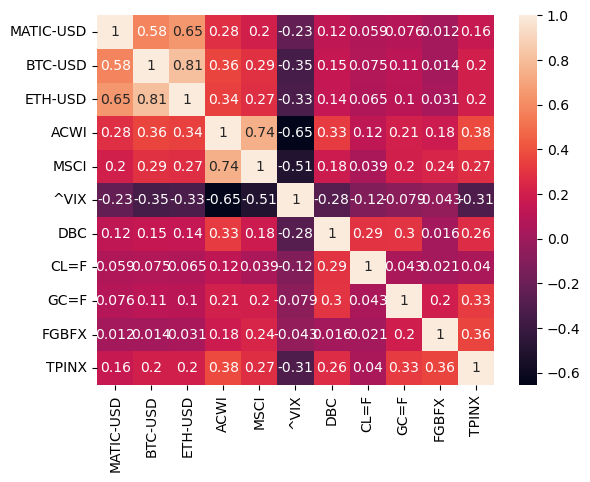

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True);

In [10]:
df.rename(columns = {'MATIC-USD':'MATIC','BTC-USD': 'BTC','ETH-USD':'ETH','^VIX':'VIX','CL=F':'Gold','GC=F':'Oil' }, inplace = True)

/var/folders/y1/fzq6mttx6fb2fs_14z8crtcm0000gn/T/ipykernel_26643/3253687643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'MATIC-USD':'MATIC','BTC-USD': 'BTC','ETH-USD':'ETH','^VIX':'VIX','CL=F':'Gold','GC=F':'Oil' }, inplace = True)


In [11]:
import statsmodels.formula.api as smf

In [12]:
df.reset_index()

,Date,MATIC,BTC,ETH,ACWI,MSCI,VIX,DBC,Gold,Oil,FGBFX,TPINX
0,2020-03-17,0.122653,0.042108,0.030169,0.062456,0.045455,-0.081993,-0.015817,-0.060976,0.026247,-0.028542,-0.005808
1,2020-03-18,-0.024755,0.002451,0.007894,-0.060109,-0.127911,0.007114,-0.033036,-0.244156,-0.031215,-0.032644,-0.004868
2,2020-03-19,0.270081,0.181878,0.189404,0.006343,0.056532,-0.058208,0.021237,0.238095,0.000880,-0.012373,-0.007828
3,2020-03-20,-0.037840,0.001225,-0.028235,-0.031688,0.024099,-0.082778,-0.010850,-0.110626,0.003652,0.002278,-0.006903
4,2020-03-21,0.032773,-0.002212,0.000614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2023-03-11,0.005079,0.022052,0.037406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1090,2023-03-12,0.087107,0.074230,0.072626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1091,2023-03-13,0.031471,0.091752,0.056603,0.000000,0.000000,0.000000,-0.006337,-0.024517,0.026692,0.000000,0.000000
1092,2023-03-14,0.006167,0.022669,0.013806,0.011232,0.049744,-0.043145,-0.012755,-0.046390,-0.002877,-0.005277,0.007732


In [13]:
smf.ols('MATIC ~ BTC + ETH+ ACWI + MSCI + VIX + DBC + Gold + Oil + FGBFX + TPINX', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  MATIC   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     82.61
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          6.14e-126
Time:                        17:46:50   Log-Likelihood:                 1550.0
No. Observations:                1094   AIC:                            -3078.
Df Residuals:                    1083   BIC:                            -3023.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0033      0.002      1.856      0.064      -0.000       0.007
BTC            0.3329      0.085      3.900      0.000       0.165       0.500
ETH            0.8361      0.064     13.086      0.000       0.711       0.961
ACWI           0.6958      0.296      2.349      0.019       0.115       1.277
MSCI          -0.1384      0.134     -1.030      0.303      -0.402       0.125
VIX            0.0491      0.037      1.323      0.186      -0.024       0.122
DBC            0.0881      0.181      0.487      0.626      -0.267       0.443
Gold           0.0034      0.018      0.191      0.848      -0.032       0.038
Oil           -0.0820      0.223     -0.369      0.713      -0.519       0.355
FGBFX         -0.3981      0.625     -0.637      0.524      -1.625       0.828
TPINX          0.3448      0.629      0.548      0.584      -0.890       1.580
==============================================================================
Omnibus:                      695.597   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11590.578
Skew:                           2.646   Prob(JB):                         0.00
Kurtosis:                      18.042   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""